My goal for this notebook is to develop some intuition about poker, specifically for the Texas Hold'em game. 

Some things I want to know is:
1. If I'm dealt certain whole cards, should I play it or not?
2. For certain whole cards, what are my chances of improving my hands?
3. Does the game change when I play with different number of opponents?

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from time import time
import itertools
import pickle
import os.path

from Basics import Deck, test_shuffle
from win_lose import evaluate_7cards, evaluate_5cards, best_hand
from Game_Board import Test_Game

Testing basic functions and methods

In [2]:
mydeck = Deck()

In [3]:
#showing the unshuffled order of the deck
mydeck.order()

['14♣',
 '2♣',
 '3♣',
 '4♣',
 '5♣',
 '6♣',
 '7♣',
 '8♣',
 '9♣',
 '10♣',
 '11♣',
 '12♣',
 '13♣',
 '14♢',
 '2♢',
 '3♢',
 '4♢',
 '5♢',
 '6♢',
 '7♢',
 '8♢',
 '9♢',
 '10♢',
 '11♢',
 '12♢',
 '13♢',
 '14♡',
 '2♡',
 '3♡',
 '4♡',
 '5♡',
 '6♡',
 '7♡',
 '8♡',
 '9♡',
 '10♡',
 '11♡',
 '12♡',
 '13♡',
 '14♠',
 '2♠',
 '3♠',
 '4♠',
 '5♠',
 '6♠',
 '7♠',
 '8♠',
 '9♠',
 '10♠',
 '11♠',
 '12♠',
 '13♠']

In [4]:
#testing the shuffle function in Deck to see if hands are distributed equally
df_test_shuffle = test_shuffle(mydeck, 10000)

In [5]:
s_test_summary = df_test_shuffle.mean().sort_values(ascending = False).rename('avg_hand_freq')
s_test_summary

8♠     25.8726
6♠     25.7781
10♠    25.7619
8♡     25.7111
13♠    25.6960
12♣    25.6719
2♣     25.6678
9♡     25.6628
10♢    25.6511
7♠     25.6464
5♣     25.6388
8♢     25.6263
3♠     25.6162
2♡     25.6088
2♢     25.5987
11♢    25.5882
10♡    25.5817
6♣     25.5593
12♢    25.5552
14♢    25.5364
9♣     25.5328
7♡     25.5201
14♣    25.5178
3♣     25.5139
14♠    25.5052
3♡     25.5027
11♣    25.5007
14♡    25.4963
11♡    25.4933
9♠     25.4859
8♣     25.4855
5♠     25.4842
4♣     25.4763
7♣     25.4759
6♡     25.4623
9♢     25.4385
4♢     25.4305
13♢    25.4296
12♡    25.4228
10♣    25.4132
4♠     25.3972
13♣    25.3922
11♠    25.3483
2♠     25.3301
4♡     25.3076
12♠    25.2904
6♢     25.2800
13♡    25.2480
3♢     25.2406
5♢     25.2377
7♢     25.2060
5♡     25.1051
Name: avg_hand_freq, dtype: float64

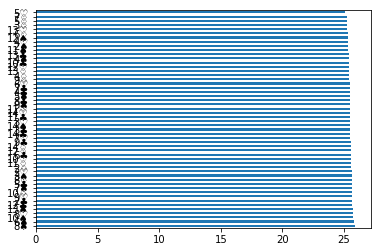

In [6]:
s_test_summary.plot(kind = 'barh')
plt.show()

Seems like the classes and the shuffle functions working okay

Trying to run some code a few times to collect some simulation data

In [73]:
print('starting time: {}'.format(time()))
t0 = time()
winning_df = pd.DataFrame()
whole_list = []
hands = 200000 #200000, 70091 seconds = 1168 min = 19 hrs
participants = 10
for i in range(hands):
    winner_data = []

    

    game_info = []
    whole_cards, comm = Test_Game('HOLDEM', participants)
    whole_list += list(whole_cards.values())
    
    for player in whole_cards:
        player_cards = whole_cards[player]

        game_info.append([player, player_cards, comm])


    game_info_df = pd.DataFrame(game_info, columns = ['player', 'whole', 'comm'])
    game_info_df['combined'] = game_info_df['whole'] + game_info_df['comm']
    game_info_df['mess'] = game_info_df['combined'].apply(evaluate_7cards)
    game_info_df['best hand'] = game_info_df['mess'].apply(lambda x:x[0][0])
    game_info_df['eval'] = game_info_df['mess'].apply(lambda x:x[0][1])
    best = best_hand(list(game_info_df['mess'].apply(lambda x:x[0])))

    winner = game_info_df[game_info_df['eval'] == best[0][1]][['player', 'whole', 'comm', 'best hand', 'eval']]
    winner['round'] = i
    winning_df = winning_df.append(winner)
    

print('took {} seconds'.format(time() - t0))
print(winning_df.head())
#seems like for every 10 games, it takes ~5 seconds to run the algo
#so 1,000,000 games should take 500,000 seconds = 8333 mins = 138 hrs = 5.7 days to run.

starting time: 1533156630.537981
took 70091.83231210709 seconds
   player     whole                    comm               best hand  \
9       9  [9♣, 4♣]   [14♠, 9♡, 9♢, 4♡, 4♠]    (9♣, 4♣, 9♡, 9♢, 4♡)   
6       6  [9♢, 2♠]  [12♣, 4♠, 9♡, 10♠, 9♣]  (9♢, 12♣, 9♡, 10♠, 9♣)   
2       2  [8♡, 8♢]  [10♡, 7♠, 8♣, 10♣, 9♢]  (8♡, 8♢, 10♡, 8♣, 10♣)   
0       0  [2♡, 4♢]   [6♡, 3♠, 6♠, 5♣, 13♢]    (2♡, 4♢, 6♡, 3♠, 5♣)   
8       8  [4♡, 2♠]   [6♡, 3♠, 6♠, 5♣, 13♢]    (4♡, 2♠, 6♡, 3♠, 5♣)   

                            eval  round  
9          (7, Full House, 9, 0)      0  
6  (4, 3 of a Kind, 9, [12, 10])      1  
2          (7, Full House, 8, 0)      2  
0            (5, Straight, 6, 0)      3  
8            (5, Straight, 6, 0)      3  


In [92]:
whole_df = pd.DataFrame({'whole': whole_list})
whole_df = whole_df['whole'].apply(sorted).apply(tuple).value_counts().to_frame()
whole_df.rename(columns = {'whole': 'whole counts'}, inplace = True)
print(whole_df.head())

           whole counts
(11♡, 7♠)          1643
(12♡, 2♡)          1637
(14♢, 9♠)          1631
(14♡, 4♣)          1630
(14♣, 4♠)          1628


In [93]:
#might want to save this thing
#should run it for 2, 5 and 10 players
winner_10p_filename = 'Data/winner_sim_200k_10p.pickle' #this is for 10p
whole_10p_filename = 'Data/whole_sim_200k_10p.pickle' #this is for 10p
#file_name = 'Data/whole_card_sim_200k_5p.pickle' #this is for 5p
#file_name = 'Data/whole_card_sim_200k_2p.pickle' #this is for 2p

In [105]:
#not sure why this didn't work with the if statement
with open(winner_10p_filename, 'wb') as handle: 
    pickle.dump(winning_df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [106]:
#not sure why this didn't work with the if statement
with open(whole_10p_filename, 'wb') as handle: 
    pickle.dump(whole_df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
with open(winner_10p_filename, 'rb') as handle:
    winning_df = pickle.load(handle)
with open(whole_10p_filename, 'rb') as handle:
    whole_df = pickle.load(handle)

In [110]:
print(winning_df.shape)
print(whole_df.shape)

(234139, 6)
(1326, 1)


In [107]:
all_possible_whole = pd.DataFrame({'whole':[whole for whole in list(itertools.combinations(mydeck.order(), 2))]})
print(all_possible_whole.iloc[100:106])
all_possible_whole['whole rank'] = all_possible_whole['whole'].apply(lambda x: [int(i[:-1]) for i in x]).apply(lambda x: sorted(x)).apply(tuple)
all_possible_whole['whole suit'] = all_possible_whole['whole'].apply(lambda x: [i[-1] for i in x]).apply(lambda x: sorted(x)).apply(tuple)
all_possible_whole['whole'] = all_possible_whole['whole'].apply(sorted).apply(tuple)
print(all_possible_whole.iloc[100:106])
print(all_possible_whole.shape)

         whole
100  (12♢, 8♠)
101  (2♢, 10♢)
102   (2♢, 7♡)
103  (2♢, 11♢)
104  (2♢, 14♠)
105   (2♢, 5♡)
         whole whole rank whole suit
100  (12♢, 8♠)    (8, 12)     (♠, ♢)
101  (10♢, 2♢)    (2, 10)     (♢, ♢)
102   (2♢, 7♡)     (2, 7)     (♡, ♢)
103  (11♢, 2♢)    (2, 11)     (♢, ♢)
104  (14♠, 2♢)    (2, 14)     (♠, ♢)
105   (2♢, 5♡)     (2, 5)     (♡, ♢)
(1326, 3)


In [108]:
winning_df_summary = winning_df['whole'].apply(sorted).apply(tuple).copy().value_counts().to_frame()
winning_df_summary.rename(columns = {'whole': 'winning counts'}, inplace = True)
print(winning_df_summary.head())
print(winning_df_summary.shape)

            winning counts
(14♠, 14♢)             389
(14♢, 14♣)             383
(13♠, 13♣)             367
(13♠, 13♢)             366
(12♢, 12♣)             365
(1326, 1)


Check if your algo is working...

In [111]:
winning_df_summary['winning counts'].sum()

234139

In [22]:
all_possible_whole[all_possible_whole['whole rank'] == (2, 2)]

,whole,whole rank,whole suit,counts
122,"(2♠, 2♢)","(2, 2)","(♠, ♢)",228
136,"(2♢, 2♣)","(2, 2)","(♢, ♣)",208
139,"(2♡, 2♢)","(2, 2)","(♡, ♢)",229
961,"(2♠, 2♣)","(2, 2)","(♠, ♣)",225
964,"(2♠, 2♡)","(2, 2)","(♠, ♡)",225
1237,"(2♡, 2♣)","(2, 2)","(♡, ♣)",216


In [24]:
all_possible_whole[all_possible_whole['whole rank'] == (2, 14)]
#seems like my code is working

,whole,whole rank,whole suit,counts
104,"(14♠, 2♢)","(2, 14)","(♠, ♢)",162
119,"(14♢, 2♢)","(2, 14)","(♢, ♢)",223
126,"(14♡, 2♢)","(2, 14)","(♡, ♢)",174
144,"(14♣, 2♢)","(2, 14)","(♢, ♣)",167
308,"(14♠, 2♠)","(2, 14)","(♠, ♠)",184
322,"(14♠, 2♣)","(2, 14)","(♠, ♣)",161
325,"(14♠, 2♡)","(2, 14)","(♠, ♡)",158
863,"(14♢, 2♠)","(2, 14)","(♠, ♢)",123
877,"(14♢, 2♣)","(2, 14)","(♢, ♣)",151
880,"(14♢, 2♡)","(2, 14)","(♡, ♢)",139


Develop some analysis for the DataFrame and answer the following questions:
1. what hands have very slim chance of winning? by rank and suits?
    - suits can be classified as matching or not
    - ranks can be classified as connecting, 1 gap, 2 gaps, etc
    - ranks can also be looked at by pairs, have at least an Ace, King, etc
2. what is the cutoff standard for winning percentages?
    - we can sort and plot. see if there's an elbow in the plot, for the categories that we've came up with
    - we can also answer some myths:
        - are 2, 7s the worst hands?
        - small pairs, do they always suck?
3. What ends up being the eventual winners?

some classification ideas:
1. suit:
    - same suit
    - different suit
  
2. rank:
    - pair of different sizes
    - at least a high card
    - does suit play a dramatic role?
    - gaps (0, 1, 2, 3, 4, 5+)
    
Also, how do things differ for 10 player, 5 player, and 2 player games? Is what we've found about 10 players not applicable anymore?

In [112]:
#these two functions help me come up with some classifications
def suit_cat(x):
    if x[0] == x[1]:
        return 'same'
    else:
        return 'diff'
    
def rank_cat(x):
    max_rank = max(int(x[0]), int(x[1]))
    min_rank = min(int(x[0]), int(x[1]))
    
    if max_rank == min_rank:
        status1 = 'pair'
    elif abs(max_rank - min_rank) == 1 or (max_rank == 14 and min_rank == 2):
        status1 = '1gap'
    elif abs(max_rank - min_rank) == 2 or (max_rank == 14 and min_rank == 3):
        status1 = '2gap'
    elif abs(max_rank - min_rank) == 3 or (max_rank == 14 and min_rank == 4):
        status1 = '3gap'
    elif abs(max_rank - min_rank) == 4 or (max_rank == 14 and min_rank == 5):
        status1 = '4gap'
    else:
        status1 = '5gap+' 
        
    if max_rank >= 11:
        status2 = 'high'
    elif max_rank >= 6:
        status2 = 'mid'
    else:
        status2 = 'low'
    return status2 + ' ' + status1

In [113]:
all_possible_whole['suit cat'] = all_possible_whole['whole suit'].apply(suit_cat)
all_possible_whole['rank cat'] = all_possible_whole['whole rank'].apply(rank_cat)
all_possible_whole[all_possible_whole['whole rank'] == (3, 14)]

,whole,whole rank,whole suit,suit cat,rank cat
292,"(14♠, 3♡)","(3, 14)","(♠, ♡)",diff,high 2gap
296,"(14♠, 3♠)","(3, 14)","(♠, ♠)",same,high 2gap
331,"(14♠, 3♣)","(3, 14)","(♠, ♣)",diff,high 2gap
334,"(14♠, 3♢)","(3, 14)","(♠, ♢)",diff,high 2gap
392,"(14♢, 3♡)","(3, 14)","(♡, ♢)",diff,high 2gap
399,"(14♡, 3♡)","(3, 14)","(♡, ♡)",same,high 2gap
417,"(14♣, 3♡)","(3, 14)","(♡, ♣)",diff,high 2gap
554,"(14♢, 3♠)","(3, 14)","(♠, ♢)",diff,high 2gap
561,"(14♡, 3♠)","(3, 14)","(♠, ♡)",diff,high 2gap
579,"(14♣, 3♠)","(3, 14)","(♠, ♣)",diff,high 2gap


In [114]:
all_possible_whole = all_possible_whole.merge(whole_df, how = 'outer', left_on = 'whole', right_index = True)
all_possible_whole = all_possible_whole.merge(winning_df_summary, how = 'outer', left_on = 'whole', right_index = True)
#all_possible_whole['whole occurance'] = all_possible_whole['whole counts'] / hands / participants
#all_possible_whole['whole winning %'] = all_possible_whole['winning counts'] / all_possible_whole['whole counts']
print(all_possible_whole.shape)
print(all_possible_whole.head())

(1326, 9)
       whole whole rank whole suit suit cat   rank cat  whole counts  \
0  (12♢, 9♠)    (9, 12)     (♠, ♢)     diff  high 3gap          1600   
1   (2♢, 9♠)     (2, 9)     (♠, ♢)     diff  mid 5gap+          1561   
2  (10♢, 9♠)    (9, 10)     (♠, ♢)     diff   mid 1gap          1503   
3   (7♡, 9♠)     (7, 9)     (♠, ♡)     diff   mid 2gap          1496   
4  (11♢, 9♠)    (9, 11)     (♠, ♢)     diff  high 2gap          1564   

   winning counts  whole occurance  whole winning %  
0             183         0.000800         0.114375  
1             107         0.000781         0.068546  
2             183         0.000751         0.121756  
3             189         0.000748         0.126337  
4             215         0.000782         0.137468  


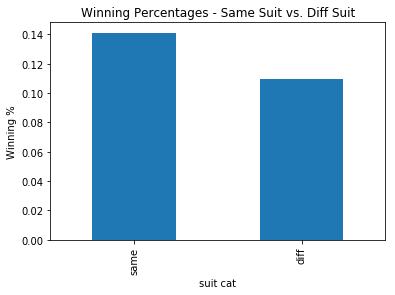

,whole counts,winning counts,whole occurance,whole winning %
suit cat,,,,
same,470580,66435,0.23529,0.141177
diff,1529420,167704,0.76471,0.109652


In [144]:
#groupby and compare suit categories to see if there's a clear difference in winning percentage. Plot if necessary
temp = all_possible_whole.groupby('suit cat')[['suit cat', 'whole counts', 'winning counts']].sum()
temp['whole occurance'] = temp['whole counts'] / hands / participants
temp['whole winning %'] = temp['winning counts'] / temp['whole counts']
temp.sort_index(ascending = False, inplace = True)
temp['whole winning %'].plot(kind = 'bar')
plt.ylabel('Winning %')
plt.title('Winning Percentages - Same Suit vs. Diff Suit')
plt.show()
temp.head()

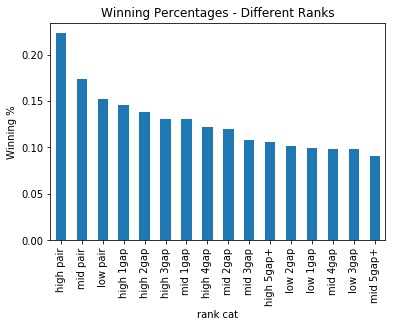

,whole counts,winning counts,whole occurance,whole winning %
rank cat,,,,
high pair,36008,8037,0.018004,0.223200
mid pair,45066,7825,0.022533,0.173634
low pair,36235,5496,0.018118,0.151677
high 1gap,120804,17604,0.060402,0.145724
high 2gap,120253,16676,0.060127,0.138674
high 3gap,121204,15886,0.060602,0.131068
mid 1gap,120455,15694,0.060228,0.130289
high 4gap,121094,14799,0.060547,0.122211
mid 2gap,120927,14522,0.060464,0.120089


In [154]:
#groupby and compare rank categories to see if there's a clear difference in winning percentage. Plot if necessary
temp = all_possible_whole.groupby('rank cat')[['rank cat', 'whole counts', 'winning counts']].sum()
temp['whole occurance'] = temp['whole counts'] / hands / participants
temp['whole winning %'] = temp['winning counts'] / temp['whole counts']
temp.sort_values(by = 'whole winning %', ascending = False, inplace = True)
temp['whole winning %'].plot(kind = 'bar')
plt.ylabel('Winning %')
plt.title('Winning Percentages - Different Ranks')
plt.show()
temp.head(20)

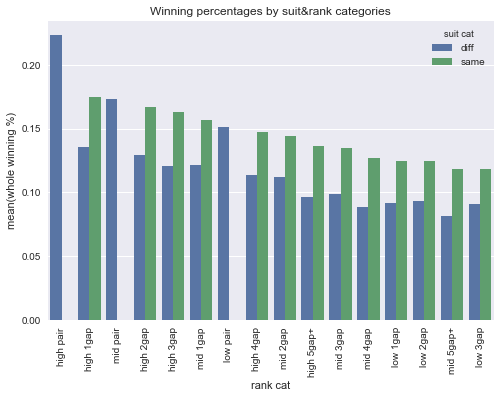

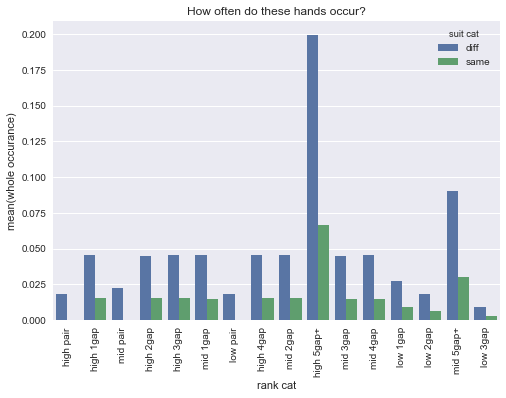

In [169]:
#let's use seaborn to give us a more definitive answer about ranks and suits
temp = all_possible_whole.groupby(['rank cat', 'suit cat'])[['rank cat', 'suit cat', 'whole counts', 'winning counts']].sum().reset_index()
temp['whole occurance'] = temp['whole counts'] / hands / participants
temp['whole winning %'] = temp['winning counts'] / temp['whole counts']
temp.sort_values(by = 'whole winning %', ascending = False, inplace = True)
sns.barplot(data = temp, x = 'rank cat', y = 'whole winning %', hue = 'suit cat')
plt.xticks(rotation = 90)
plt.title('Winning percentages by suit&rank categories')
plt.show()
sns.barplot(data = temp, x = 'rank cat', y = 'whole occurance', hue = 'suit cat')
plt.xticks(rotation = 90)
plt.title('How often do these hands occur?')
plt.show()

Within the top winning rank & suit combination, let's actually look at the cards winning percentages and occurances:
1. high pair
2. high 1gap same suit
3. mid pair
4. high 2gap same suit
5. high 3gap same suit
6. mid 1gap same suit
7. low pair
8. high 4gap same suit
9. mid 2gap same suit
10. high 5gap+ same suit (~14% chances of winning)

In [180]:
good_whole_criteria = ((all_possible_whole['rank cat'] == 'high pair') | (all_possible_whole['rank cat'] == 'mid pair') | 
                       (all_possible_whole['rank cat'] == 'low pair'))
all_possible_whole[good_whole_criteria].head()

,whole,whole rank,whole suit,suit cat,rank cat,whole counts,winning counts,whole occurance,whole winning %
34,"(9♠, 9♡)","(9, 9)","(♠, ♡)",diff,mid pair,1511,250,0.000755,0.165453
39,"(9♠, 9♣)","(9, 9)","(♠, ♣)",diff,mid pair,1485,258,0.000742,0.173737
41,"(9♠, 9♢)","(9, 9)","(♠, ♢)",diff,mid pair,1534,277,0.000767,0.180574
60,"(12♠, 12♢)","(12, 12)","(♠, ♢)",diff,high pair,1503,333,0.000751,0.221557
69,"(12♡, 12♢)","(12, 12)","(♡, ♢)",diff,high pair,1451,302,0.000726,0.208132


In [ ]:
#groupby and compare rank categories to see if there's a clear difference in winning percentage. Plot if necessary
all_possible_whole['whole occurance'] = all_possible_whole['whole counts'] / hands / participants
all_possible_whole['whole winning %'] = all_possible_whole['winning counts'] / all_possible_whole['whole counts']

Answer the following questions:
    
1. what hands have very slim chance of winning? by rank and suits?
    - suits can be classified as matching or not
    - ranks can be classified as connecting, 1 gap, 2 gaps, etc
    - ranks can also be looked at by pairs, have at least an Ace, King, etc
2. what is the cutoff standard for winning percentages?
    - we can sort and plot. see if there's an elbow in the plot, for the categories that we've came up with
    - we can also answer some myths:
        - are 2, 7s the worst hands?
        - small pairs, do they always suck?
3. What ends up being the eventual winners?
    - what are the eventual winners and their whole?
    - how often do these winners appear?
    - what type of hands and what are their chances of becoming eventual winners
    - 

In [115]:
winning_df['whole suit'].count()

whole suit    11663
dtype: int64

I need a function that tells me the possibilities with the whole and the community, namely the outs I have for improving my current position.

When it's whole cards, we'll look at the winning percentages by previous experiences. After the flop, we'll look at the best possible hands that would improve current position:
0. identify itself by using the 5 cards we already have.
1. add two blanks, iterate through all the possiblities:
    - look at those with the same score and above
    - list out all the possible cards that would improve position.
After the turn:
0. identify itself by using the 6 cards we already have.
1. add 1 blanks, iterate through all the possibilities:
    - look at those with the same score and above
    - list out all the possible cards that would improve position.
After the river:
0. identify itself by using the 7 cards we already have.

I also need a function that compares hands on the game board if all cards are visible. This will come from one player's POV, and evaluate hands against his opponent(s).